In [1]:
#Importing the libraries
import numpy as np  # Library for numerical operations and arrays.
import pandas as pd  # Data manipulation library for structured data.
from sklearn.datasets import load_breast_cancer  # Loads the breast cancer dataset.
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets.
from sklearn.preprocessing import StandardScaler  # Standardizes features to a common scale.
from sklearn.ensemble import RandomForestClassifier  # Classifier using an ensemble of decision trees.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Metrics for evaluating model performance.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns

In [2]:
#Data gathering and preprocessing
cancer_data = load_breast_cancer()  # Loads the Breast Cancer Wisconsin dataset into a variable.
X = cancer_data.data  # Extracts the feature data (independent variables) from the dataset.
y = cancer_data.target  # Extracts the target labels (dependent variable) from the dataset.

In [3]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(data=X, columns=cancer_data.feature_names)  # Converts feature data into a Pandas DataFrame with appropriate column names.
df['target'] = y  # Adds the target labels to the DataFrame as a new column.

In [6]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [7]:
#number of rows and columns
df.shape

(569, 31)

In [8]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
#checking null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
#statistical measures about the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


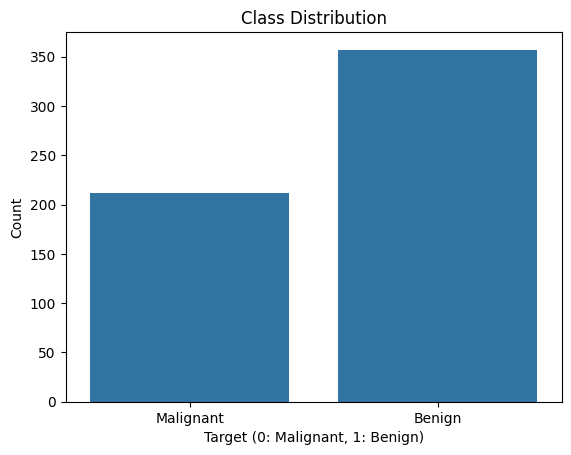

In [11]:
# Visualizing the class distribution
sns.countplot(x='target', data=df)  # Creates a count plot to visualize the distribution of target classes in the DataFrame.
plt.title('Class Distribution')
plt.xlabel('Target (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant', 'Benign'])  # Customizes the x-tick labels to show class names instead of numbers.
# plt.savefig('Downloads/class_distribution.png')
plt.show()

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [14]:
print(y.shape, y_train.shape, y_test.shape)

(569,) (455,) (114,)


In [15]:
# Standardize the data
scaler = StandardScaler()  # Initializes the scaler for standardization.
X_train = scaler.fit_transform(X_train)  # Fits and transforms the training data.
X_test = scaler.transform(X_test)  # Transforms the test data using the fitted scaler.

In [16]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Creates a Random Forest model with 100 trees for classification.

In [17]:
# Train the model
model.fit(X_train, y_train)  # Fits the model to the training data to learn patterns.

RandomForestClassifier(random_state=42)

In [18]:
# Make predictions
y_pred = model.predict(X_test)

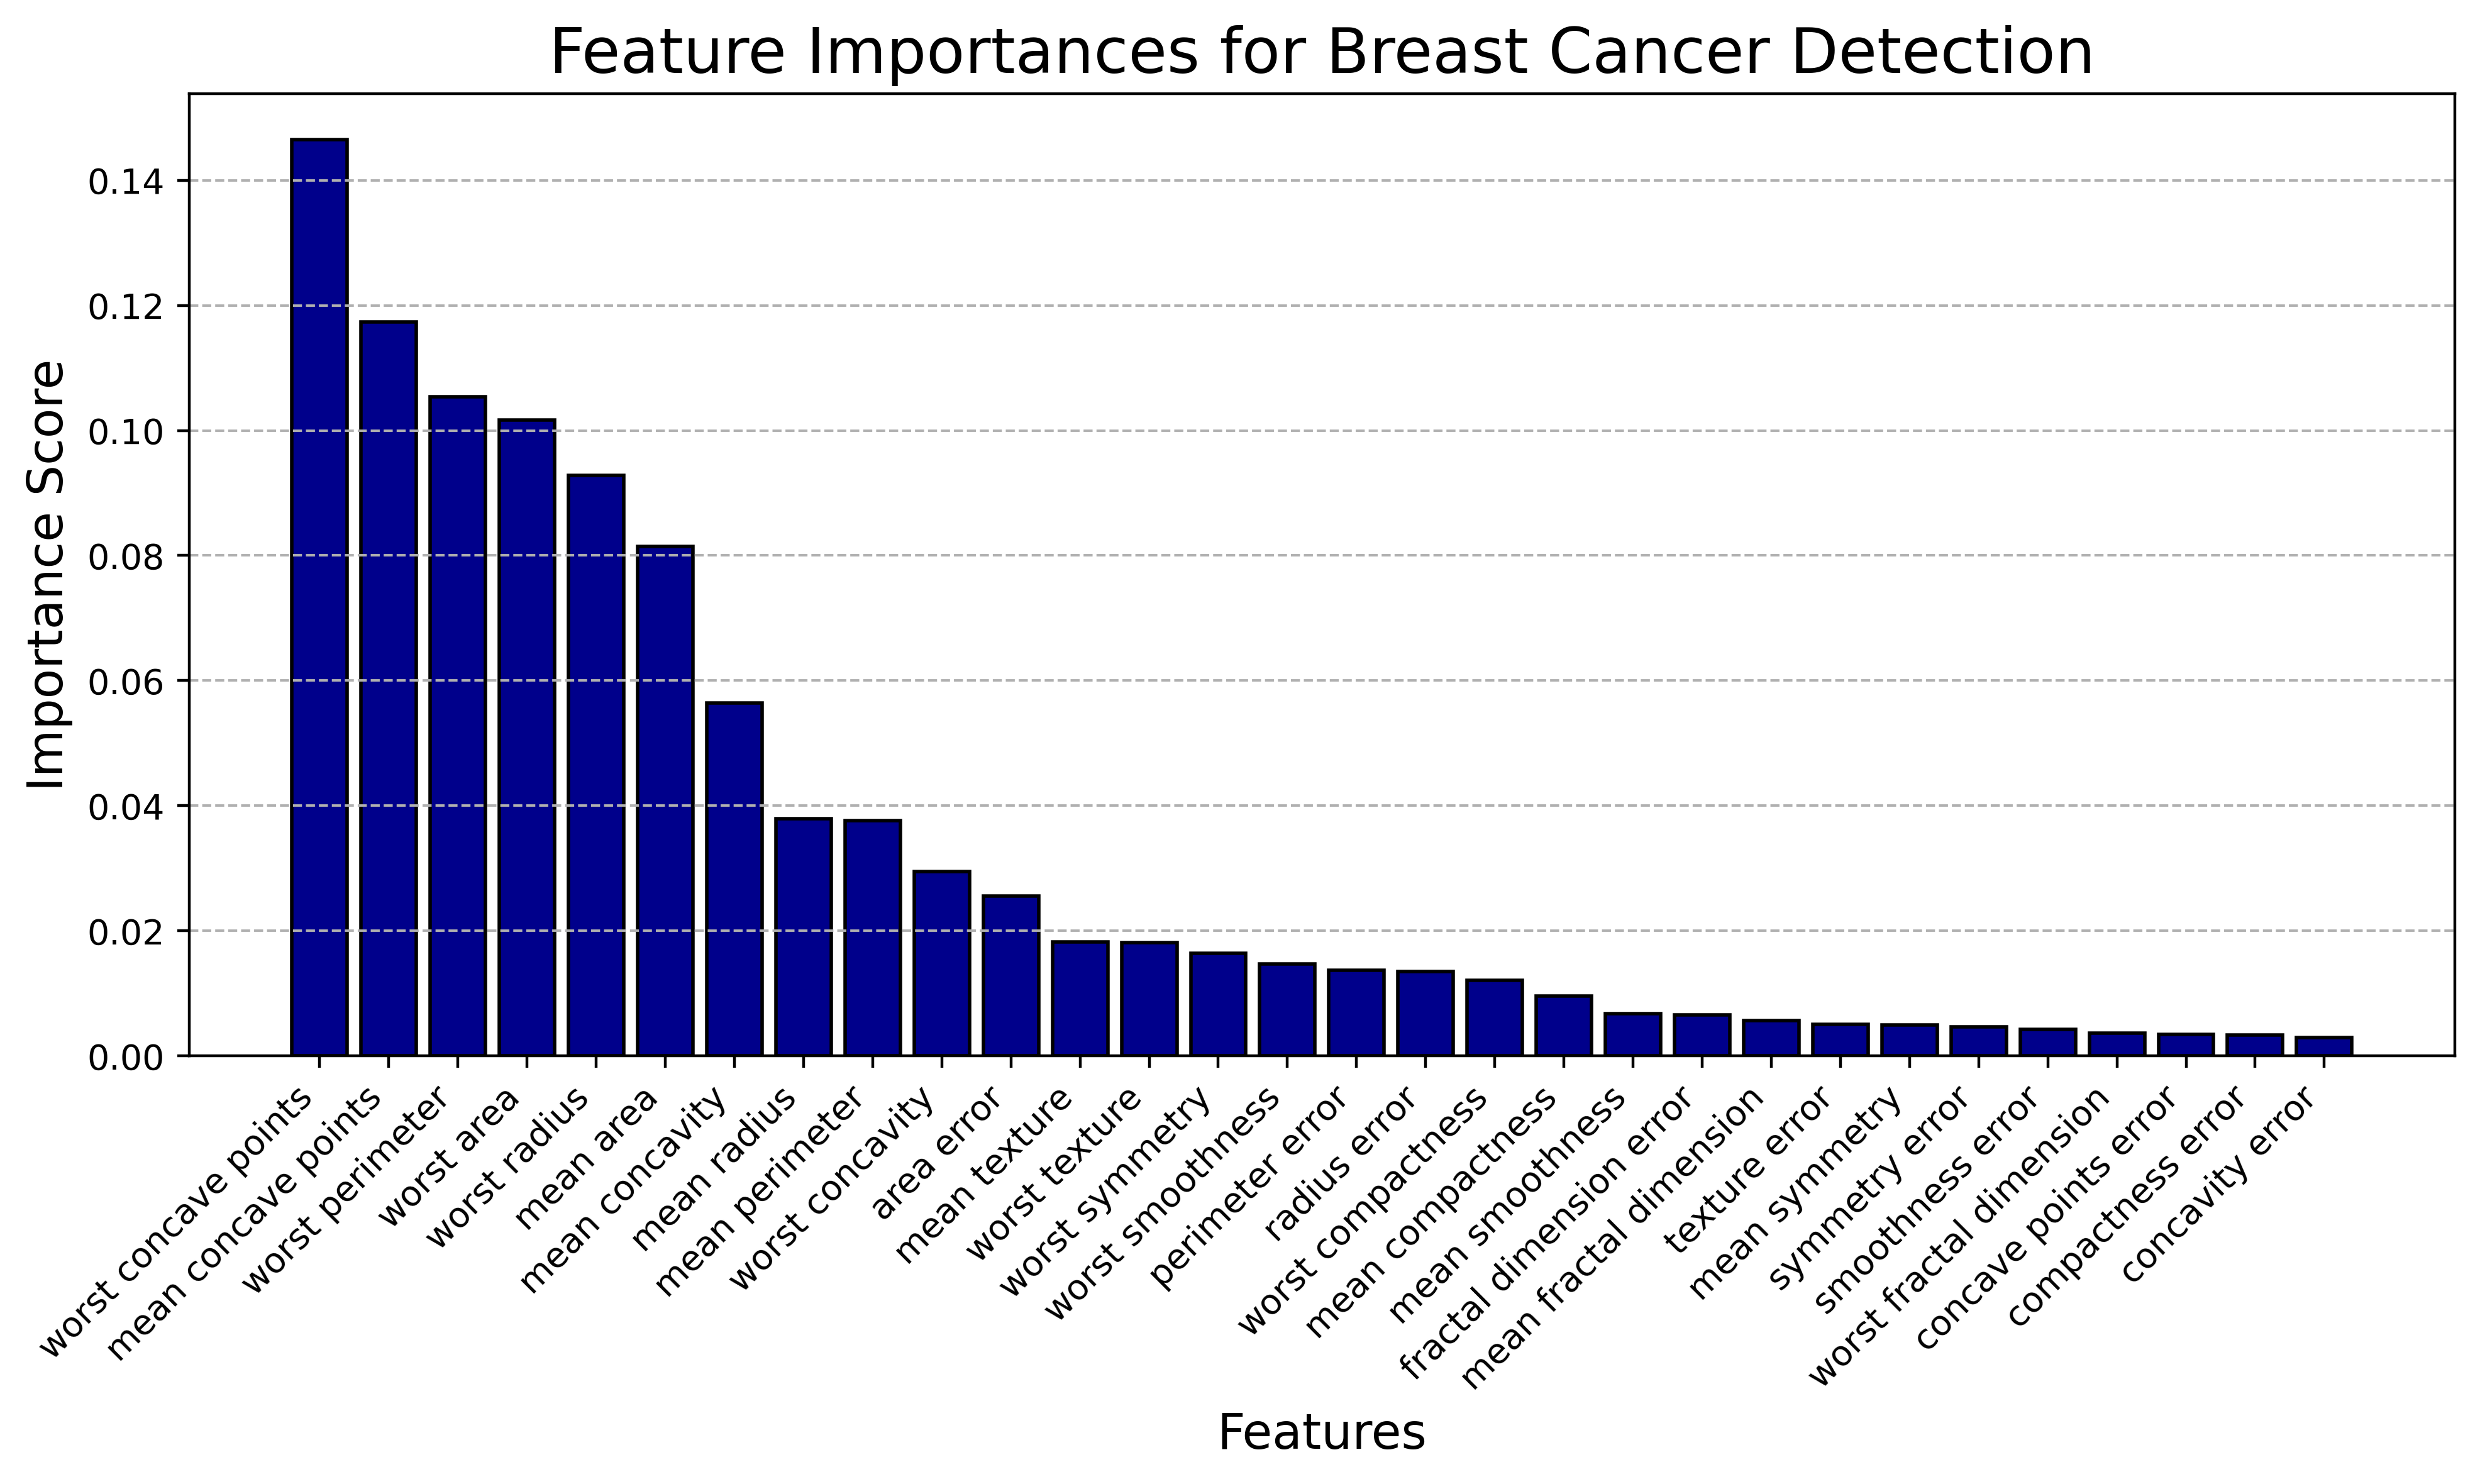

In [19]:
# Split dataset into train and test
X_train_selected, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiate and fit RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)

# Extract feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a larger figure and higher resolution for the IEEE paper
plt.figure(figsize=(10, 6), dpi=400)  # Adjust the size and DPI for clarity in print

# Title and axis labels with IEEE-style font sizes
plt.title("Feature Importances for Breast Cancer Detection", fontsize=18)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)

# Plotting feature importances with a minimalist style and grid
bars = plt.bar(range(X_train_selected.shape[1]), importances[indices], color='darkblue', edgecolor='black')
plt.xticks(range(X_train_selected.shape[1]), cancer_data.feature_names[indices], rotation=45, ha="right", fontsize=10)

# Adding grid to graphs
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Optimizes the layout to prevent overlap of elements in the plot 
plt.tight_layout()

# Save the figure as high-resolution
# plt.savefig('Downloads/feature_importance_ieee_final.png', dpi=400, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()


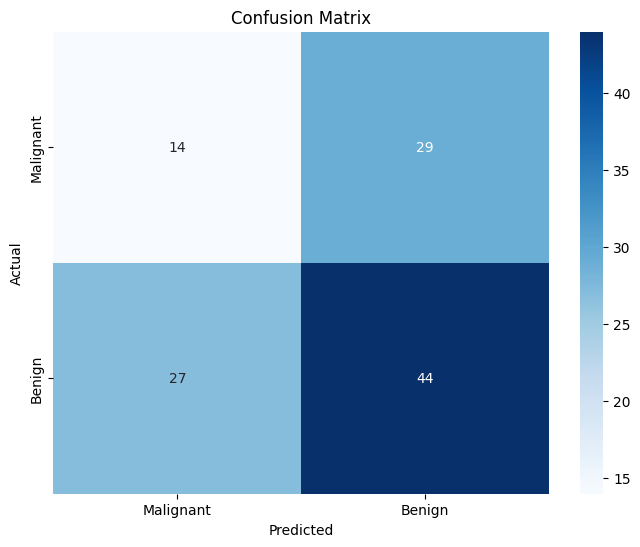

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Computes the confusion matrix to evaluate the model's performance.

# Plot confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])  # Plots the confusion matrix as a heatmap with annotations.
plt.ylabel('Actual') 
plt.xlabel('Predicted') 
plt.title('Confusion Matrix') 
# plt.savefig('Downloads/confusion_matrix.png')
plt.show() 

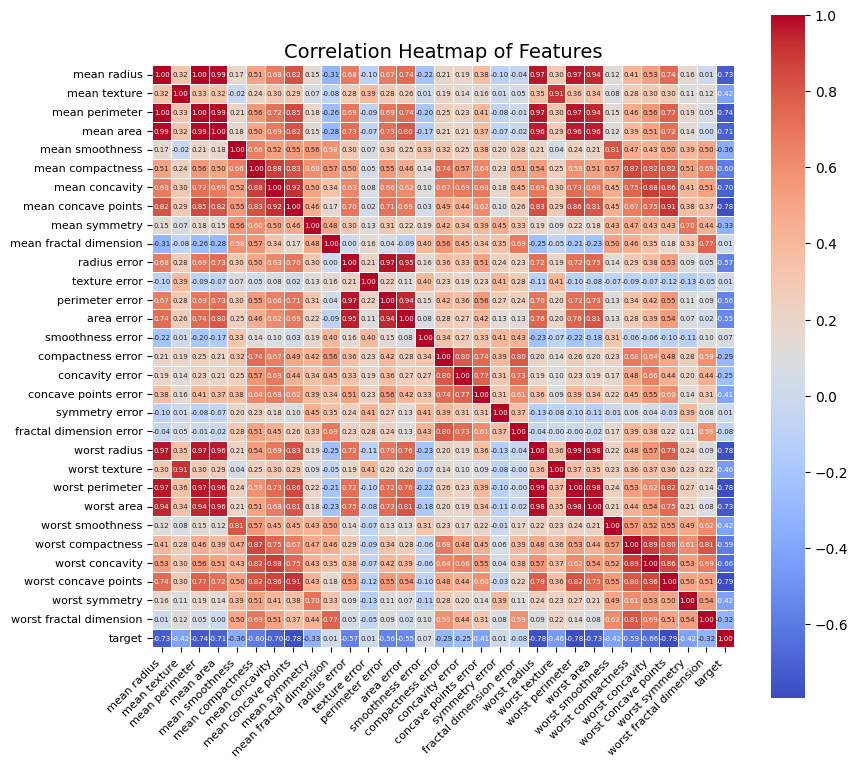

In [21]:
# Correlation Heatmap to visualize feature relationships
# 1 means a perfect positive correlation.
# 0 means no correlation.
# -1 means a perfect negative correlation.
# Set a larger figure size for better readability
plt.figure(figsize=(9, 8))
# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap with clean parameters
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True, square=True, annot_kws={"size": 5})

# Rotate x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Set the title
plt.title('Correlation Heatmap of Features', fontsize=14)

# Optimizes the layout to prevent overlap of plot elements
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# Classification report showing the precision, recall, and F1-score for each class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.33      0.33        43
           1       0.60      0.62      0.61        71

    accuracy                           0.51       114
   macro avg       0.47      0.47      0.47       114
weighted avg       0.50      0.51      0.51       114



In [23]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE  #for handling imbalanced datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE    #(Recursive Feature Elimination)recursively removes the least important features from a dataset

# # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply scaling for better performance
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
selector = RFE(model, n_features_to_select=10, step=1)  # Selecting top 10 features
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Tune additional hyperparameters to control overfitting
model_tuned = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Cross-validation to avoid overfitting
cv_scores = cross_val_score(model_tuned, X_train_selected, y_train_resampled, cv=5)

# Train the model
model_tuned.fit(X_train_selected, y_train_resampled)

# Predictions
y_pred_train = model_tuned.predict(X_train_selected)
y_pred_test = model_tuned.predict(X_test_selected)

# Accuracy evaluation
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display the updated accuracy and cross-validation scores
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")

Training Accuracy: 0.9819277108433735
Testing Accuracy: 0.9766081871345029
Cross-Validation Accuracy: 0.9538787878787879


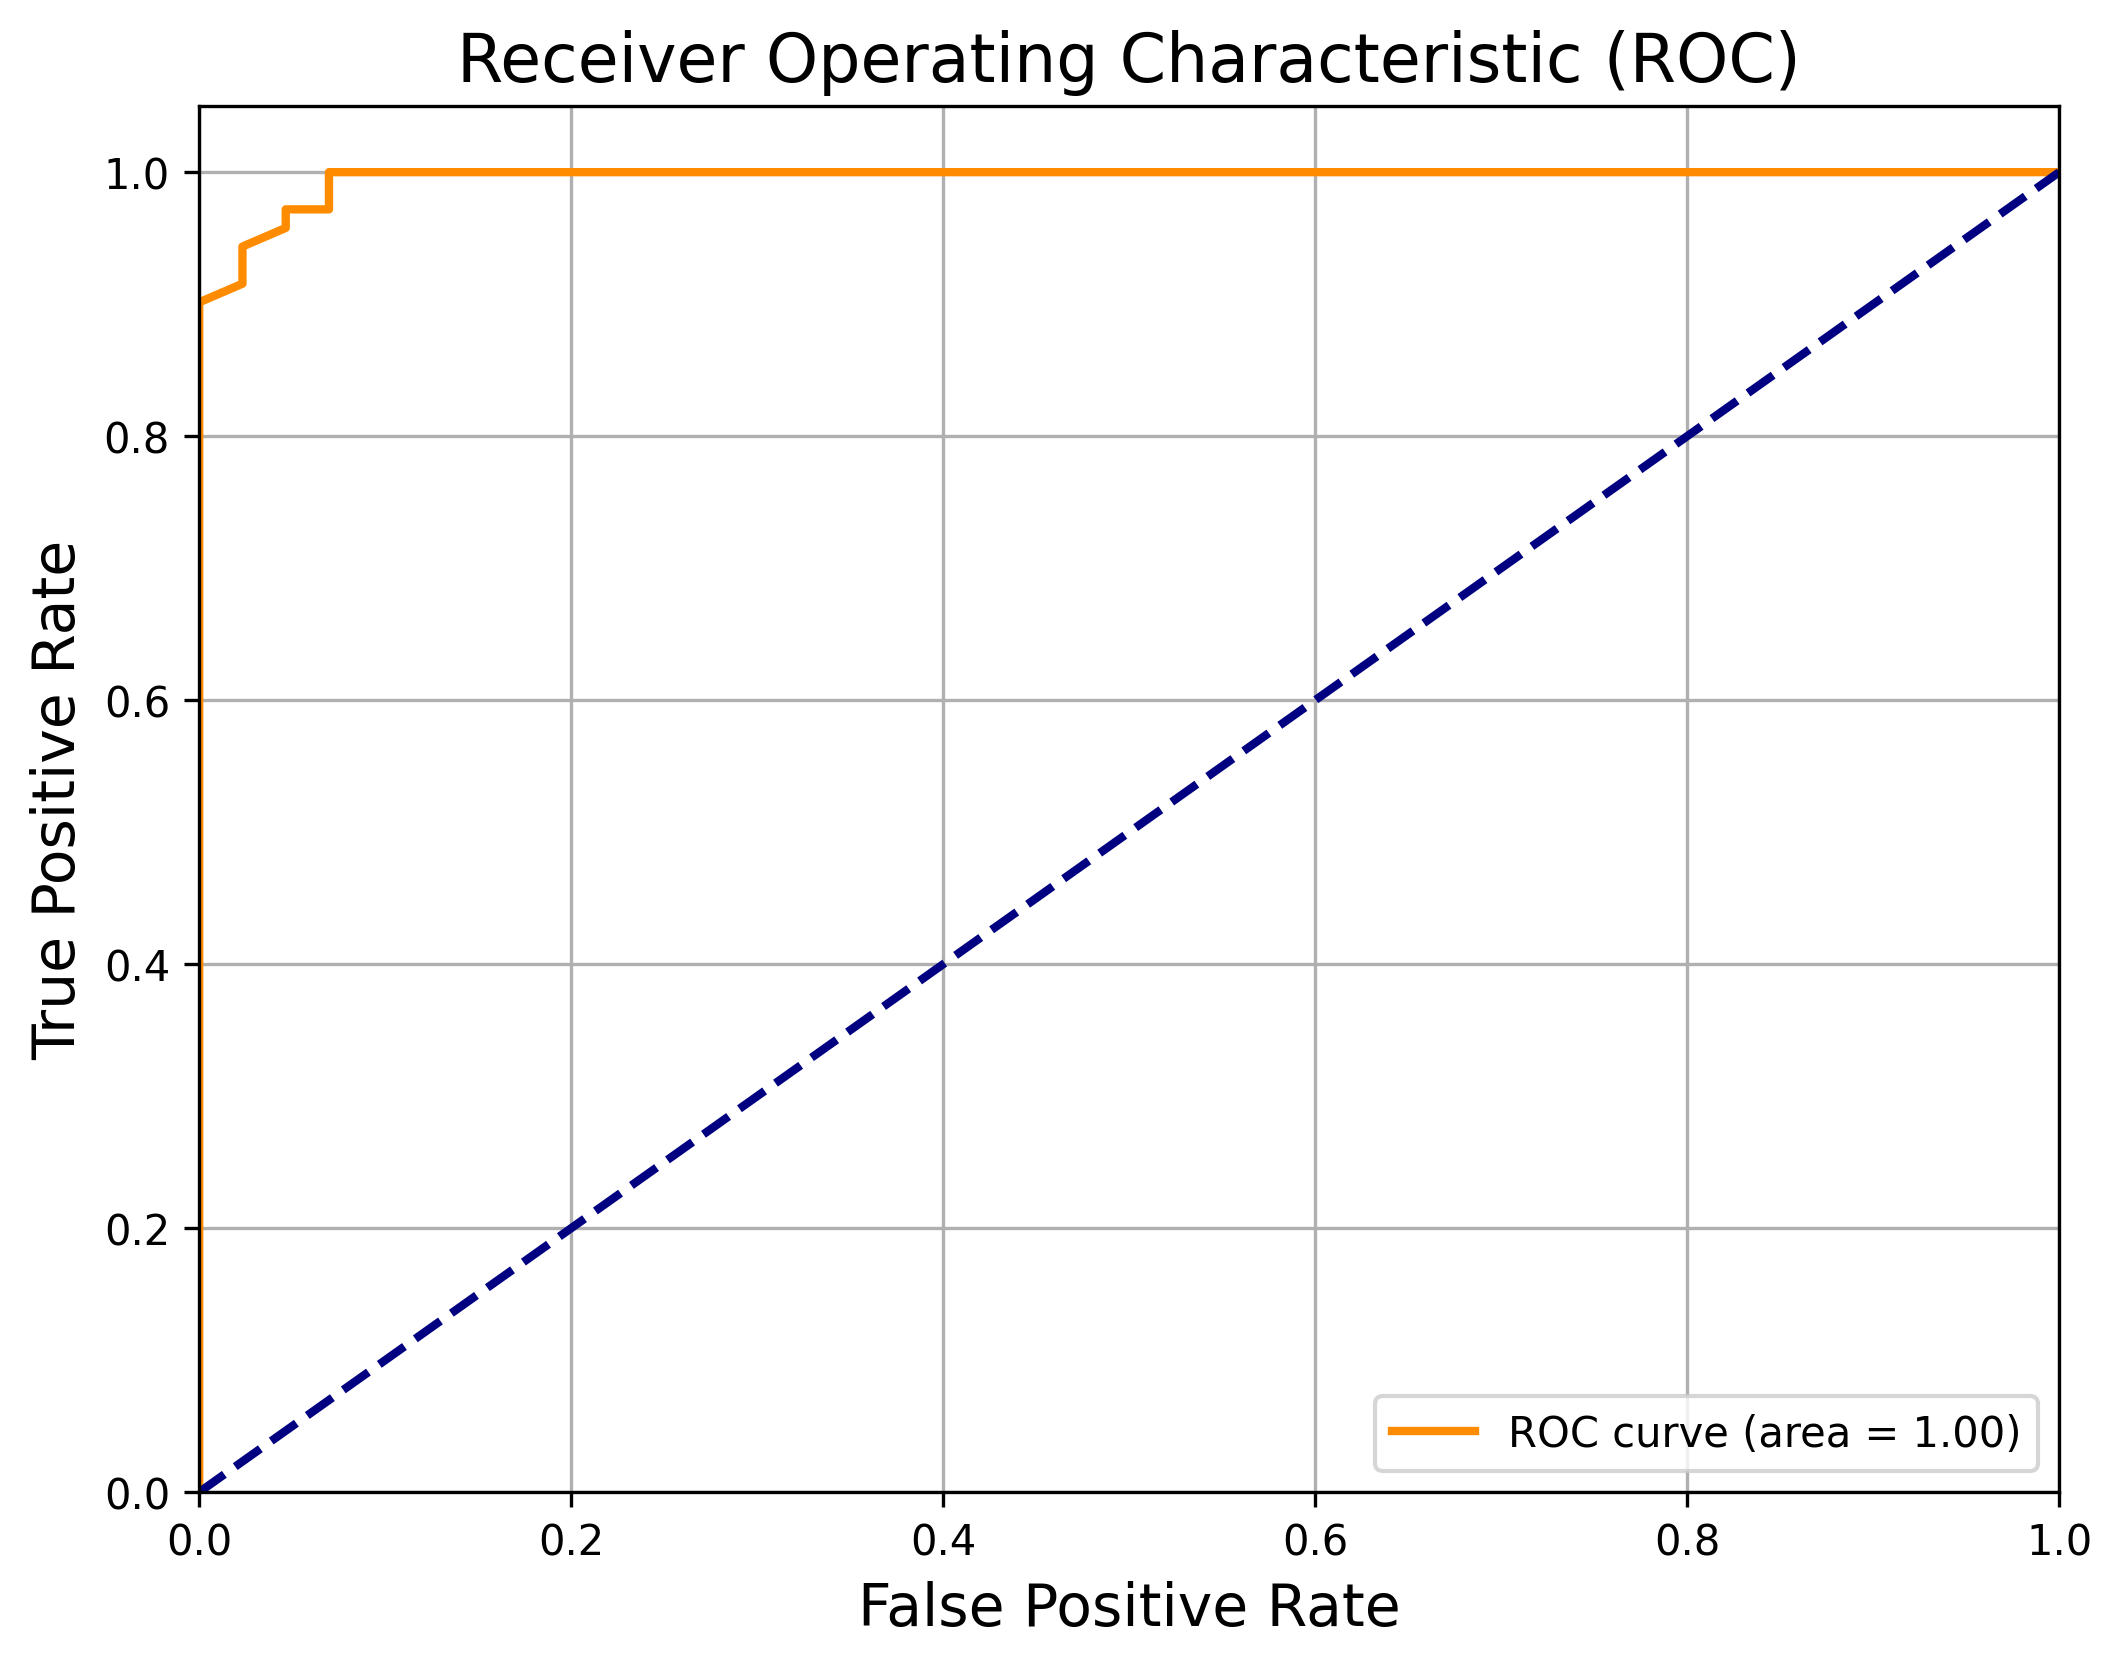

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split dataset into train and test before feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you are performing feature selection separately, 
# do feature selection here, e.g., selecting important features from X_train
# For example, using SelectKBest or similar methods:
# X_train_selected = SelectKBest(k=number_of_features).fit_transform(X_train, y_train)

# For simplicity, if you haven't performed feature selection, remove '_selected'
# and proceed with X_train and X_test as they are

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
